### 2010년부터 2021년까지 화재 발생 현황

- 연도별 사망, 부상, 이재가구 수, 이재민 수
- 건수에 따른 피해 금액(부동산, 동산 따로)
- 연도에 따른 행정구역별 건수

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\malgunbd.ttf"
kfont = matplotlib.font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

pd_data = pd.read_csv('시도별_화재발생_현황_총괄__20230307153250.csv', encoding = 'cp949')
pd_data.columns = ['시도별', '연도', '건수', '사망', '부상', '피해금액합계', '부동산피해금액', '동산피해금액', '이재가구수', '이재민수']
print(pd_data)

         시도별    연도     건수   사망    부상     피해금액합계    부동산피해금액     동산피해금액  이재가구수  \
0         전국  2010  41863  304  1588  266776332  117808118  148968214   1183   
1         전국  2011  43875  263  1599  256547614  113257928  143289686   1158   
2         전국  2012  43249  267  1955  289493719  127500018  161993701   1062   
3         전국  2013  40932  307  1877  434462330  178812680  255649650   1354   
4         전국  2014  42135  325  1856  405356513  168824616  236531897   1178   
..       ...   ...    ...  ...   ...        ...        ...        ...    ...   
209  제주특별자치도  2017    751    5    19    3944602    2022493    1922109      9   
210  제주특별자치도  2018    636    4    23    3956895    1199603    2757292      5   
211  제주특별자치도  2019    607    3    33    2998401    1088297    1910104      6   
212  제주특별자치도  2020    515   12    14    4905209    1964304    2940905      8   
213  제주특별자치도  2021    544    3    19    6795271    2982411    3812860     13   

     이재민수  
0    2623  
1    2417  
2  

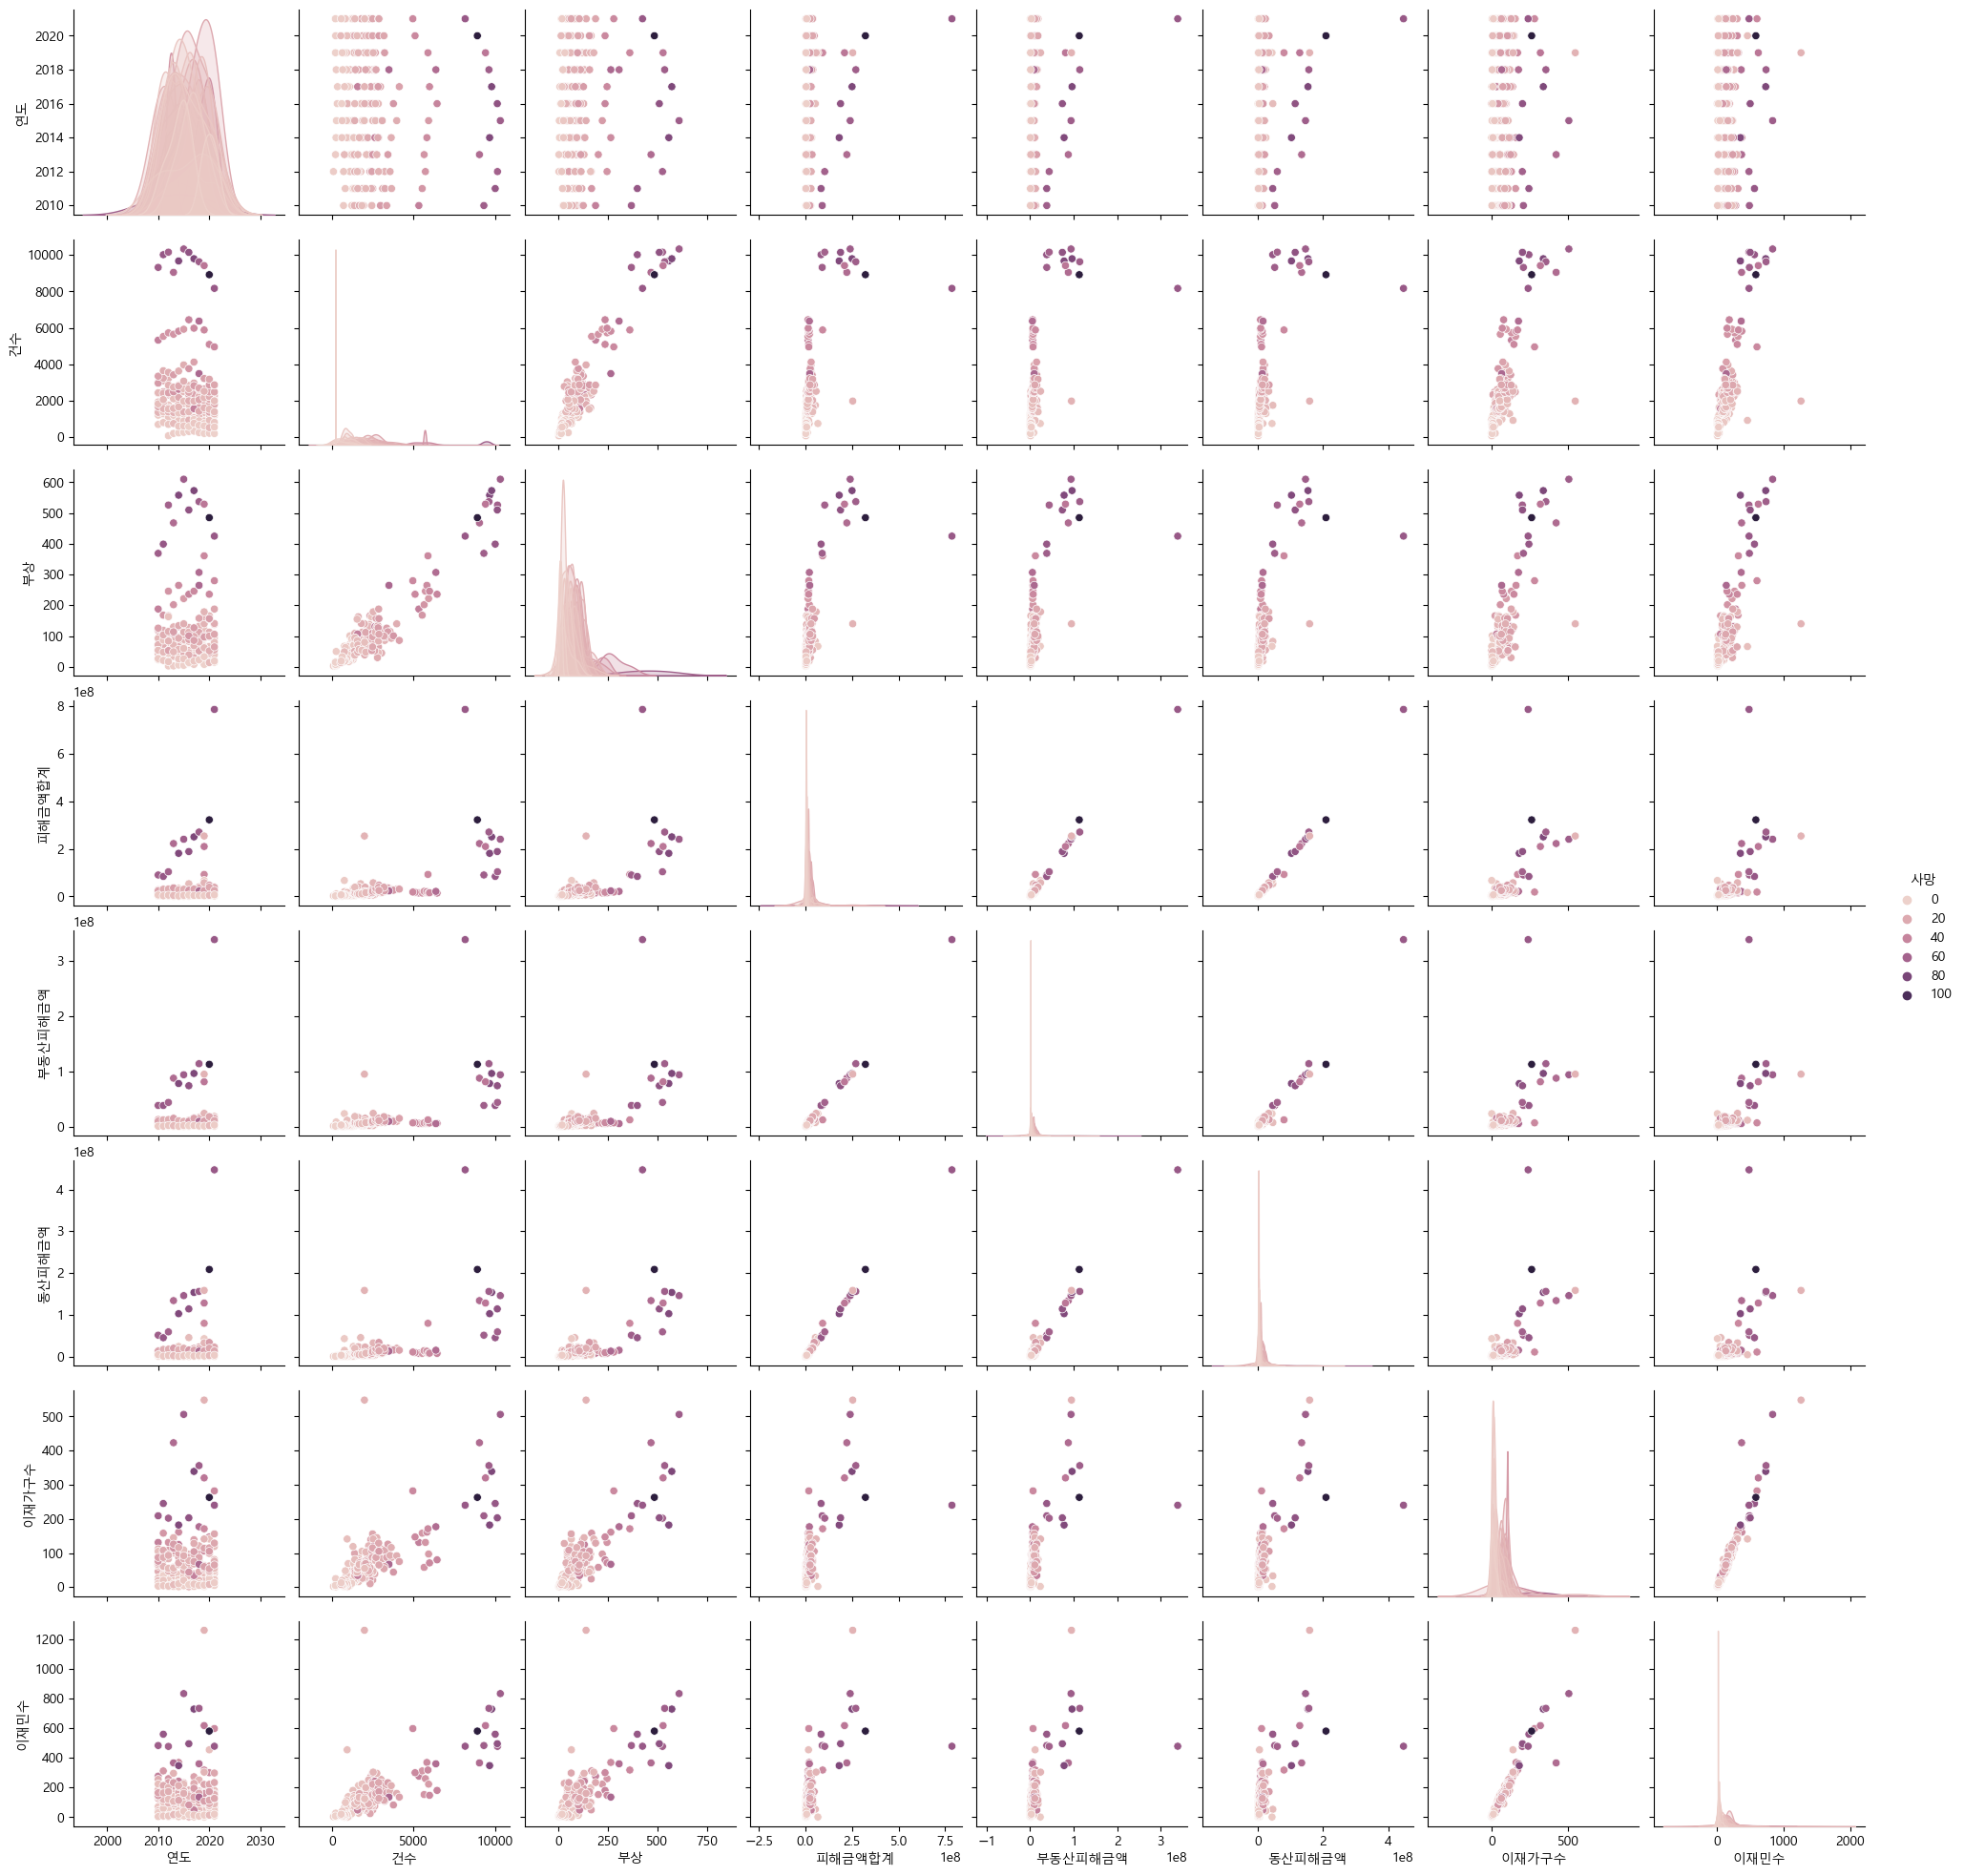

In [3]:
filter1 = pd_data['시도별'] != '전국'
# sns.relplot(data=pd_data[filter1], x="연도", y = '이재민수', hue = '이재민수')
# sns.kdeplot(data=pd_data[filter1], x="연도", hue="사망", multiple="stack")
# sns.displot(data=pd_data[filter1], x="연도", hue="사망", multiple="stack", kind="kde")
# sns.displot(data=pd_data[filter1], x="사망", hue="시도별", col="시도별")

# f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
# sns.scatterplot(data=pd_data[filter1], x="건수", y="부동산피해금액", hue="부동산피해금액", ax=axs[0])
# sns.histplot(data=pd_data[filter1], x="건수", hue="부동산피해금액", shrink=.8, alpha=.8, legend=True, ax=axs[1])
# f.tight_layout()

# g = sns.relplot(data=pd_data, x="피해금액합계", y="부동산피해금액")
# g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

# g = sns.relplot(data=pd_data[filter1], x="시도별", y="사망", col="연도")
# g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

# sns.jointplot(data=pd_data[filter1], x="이재가구수", y="이재민수", hue="연도", kind = 'hist')
# sns.displot(data = pd_data, x = '건수', hue = '시도별')

# print(pd_data['시도별'].unique())
# print(pd_data['시도별'].hasnans)
# print(na_filter.value_counts())
pd_data['사망'] = pd_data['사망'].replace('-', '0').astype(np.int64)
# print(pd_data['사망'].unique())
# print(pd_data['사망'].dtype)
# print(pd_data['사망'].unique())
# print(pd_data['사망'].hasnans)
# flights = pd_data.pivot('시도별', '연도', '사망')
# print(flights)
# plt.figure(figsize=(15, 15))
# sns.heatmap(flights, annot = True, fmt = 'g')
# sns.scatterplot(data=pd_data, x="연도", y="사망", s=5)
# sns.rugplot(data=pd_data, x="연도", y="사망", lw=1, alpha=.005)
# g = sns.JointGrid(data=pd_data, x="연도", y="사망")
# g.plot_joint(sns.scatterplot, s=100, alpha=.5)
# g.plot_marginals(sns.histplot, kde=True)
# g = sns.JointGrid()
# x, y = pd_data["연도"], pd_data["사망"]
# sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
# sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
# sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)
# sns.displot(data=pd_data, x="연도", hue="이재민수", col="시도별")
# f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
# sns.scatterplot(data=pd_data[filter1], x="건수", y="사망", hue="연도", ax=axs[0])
# sns.histplot(data=pd_data[filter1], x="연도", hue="연도", shrink=.8, alpha=.8, legend=False, ax=axs[1])
# f.tight_layout()
sns.pairplot(pd_data[filter1], hue = '사망')

C:\Users\ITPS\AppData\Local\Temp\ipykernel_2532\3670007449.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = pd_data.pivot('시도별', '연도', '사망')


<AxesSubplot: xlabel='연도', ylabel='시도별'>

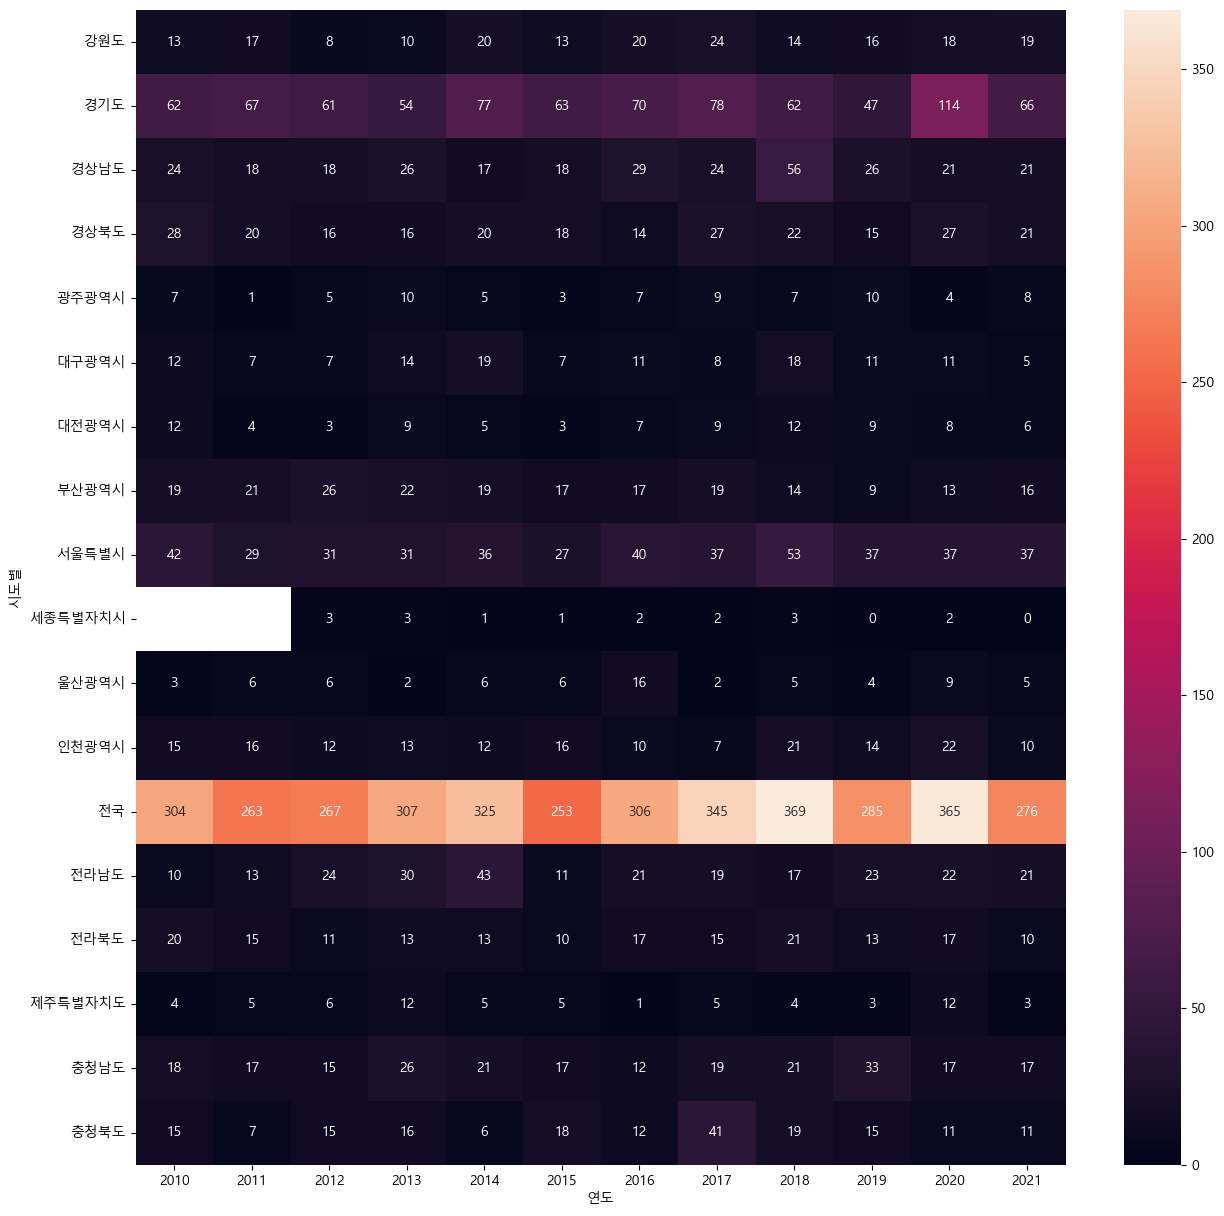

In [3]:
flights = pd_data.pivot('시도별', '연도', '사망')
plt.figure(figsize=(15, 15))

sns.heatmap(flights, annot = True, fmt = 'g')




xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0


C:\Users\ITPS\AppData\Local\Temp\ipykernel_7716\1737855163.py:10: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="연도", y="사망", data=pd_data[filter1], ax=ax,


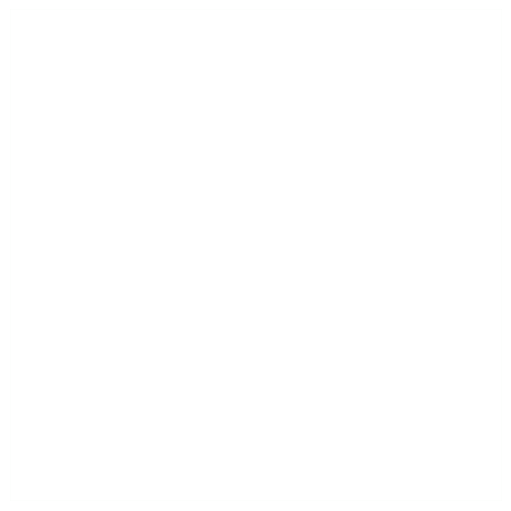

(500, 500, 4)
[4 4 4] [4 4 4] [0 1 2]
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
(489, 489, 4)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


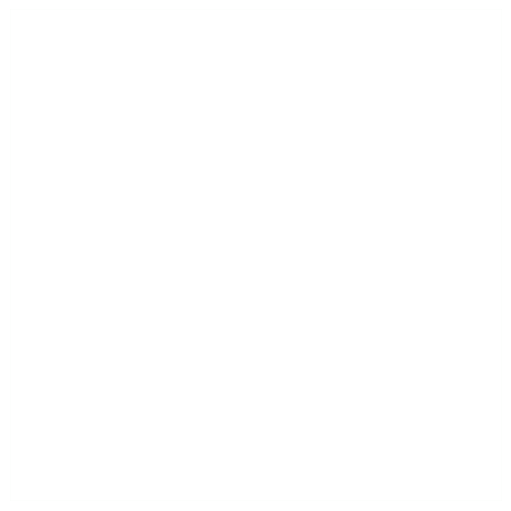

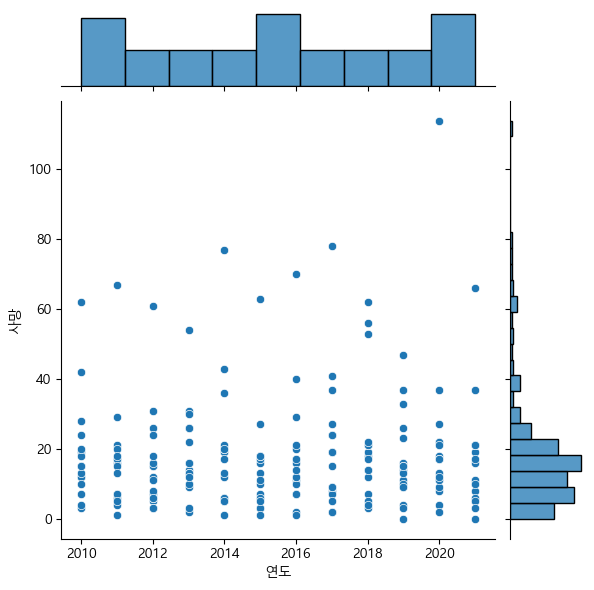

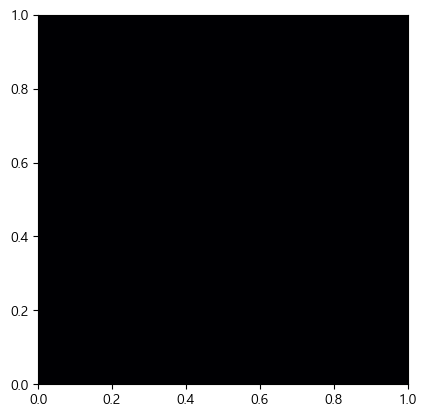

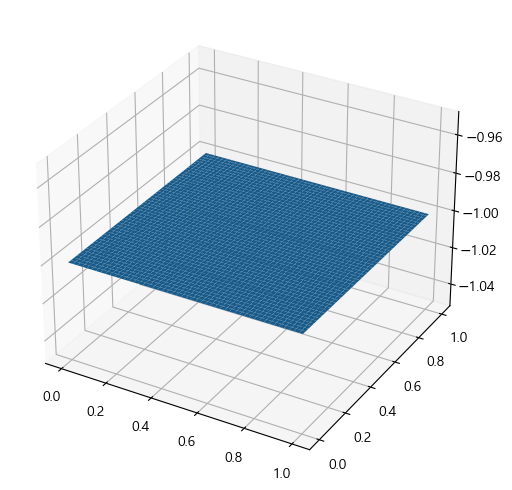

In [32]:
import cv2 as cv
import numpy as np

from PIL import Image
import matplotlib as image
import matplotlib.pyplot as plt
from matplotlib import image

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.jointplot(x="연도", y="사망", data=pd_data[filter1], ax=ax,
            )

# x, y 범위 반올림 재설정
xmin, xmax = np.round(ax.get_xlim(),2)
ymin, ymax = np.round(ax.get_ylim(),2)
print(f"xmin, xmax = {xmin}, {xmax}")
print(f"ymin, ymax = {ymin}, {ymax}")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# 윤곽선 눈금
ax.axvline(xmin, lw=0.01, c="green")
ax.axvline(xmax, lw=0.01, c="green")
ax.axhline(ymin, lw=0.01, c="green")
ax.axhline(ymax, lw=0.01, c="green")
ax.axis(False)

fig.savefig("KDE_peng.png")
display(fig)

im_pengkde = image.imread('KDE_peng.png')
print(im_pengkde.shape)

_, axe = plt.subplots()
plt.imshow(im_pengkde[:10, :10])

import matplotlib.colors as mcolors

idx_gx, idx_gy, _ =  np.where(im_pengkde[:5, :5] != mcolors.to_rgba("w"))
print(idx_gx, idx_gy, _)
im_pengkde= im_pengkde[idx_gx[0]+1:-idx_gx[0]-2, idx_gy[0]+1:-idx_gx[0]-2]
print(im_pengkde[:2, :2])
print(im_pengkde.shape)

! pip install colorspacious

from colorspacious import cspace_converter

im_pengkde_L = np.zeros(im_pengkde.shape[:2])
for i in range(im_pengkde.shape[0]):
    for j in range(im_pengkde.shape[1]):
        RGB = im_pengkde[i, j][:3]
        if sum(RGB - np.array([1, 1, 1])) == 0:
            im_pengkde_L[i, j] = -1   
        else: 
            lab = cspace_converter("sRGB1", "CAM02-UCS")(RGB)
            im_pengkde_L[i, j] = lab[0]
            

plt.imshow(im_pengkde_L, cmap="inferno",
           extent=[xmin, xmax, ymin, ymax], 
           aspect=(xmax-xmin)/(ymax-ymin))

xs = np.linspace(xmin, xmax, im_pengkde.shape[1])
ys = np.linspace(ymin, ymax, im_pengkde.shape[0])
xx, yy = np.meshgrid(xs, ys)

# 3D plot
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L)

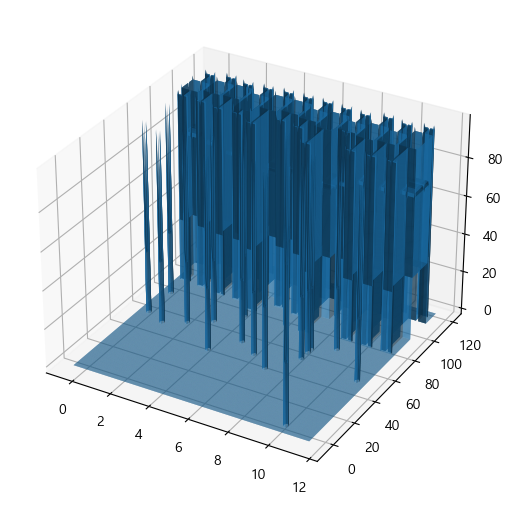

In [30]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1)

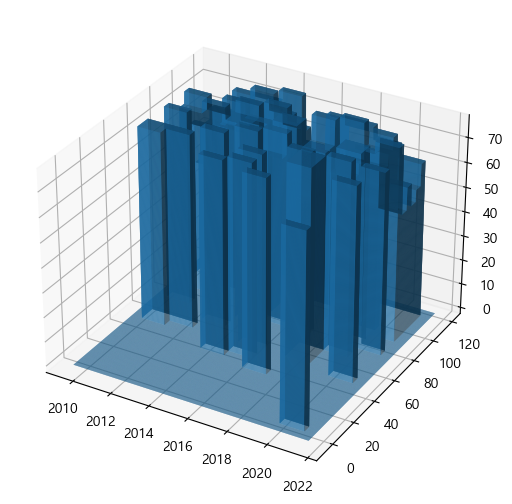

In [15]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1, lw=0)

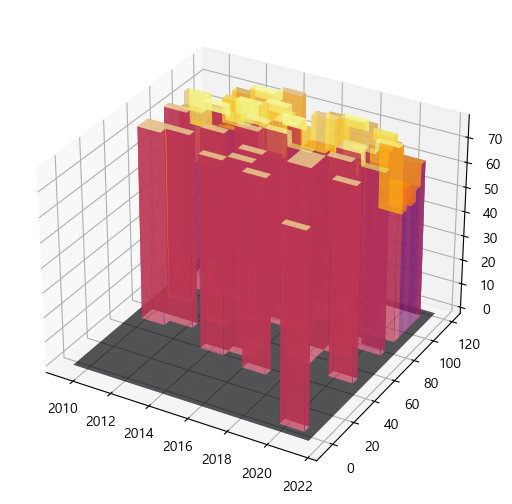

In [17]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1, lw=0, cmap="inferno")

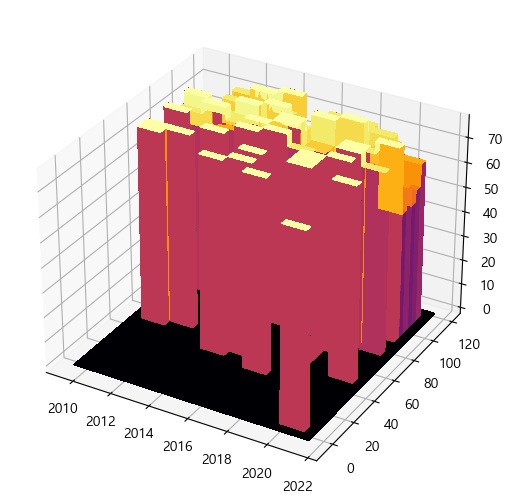

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1, lw=0, cmap="inferno", 
                antialiased=False)

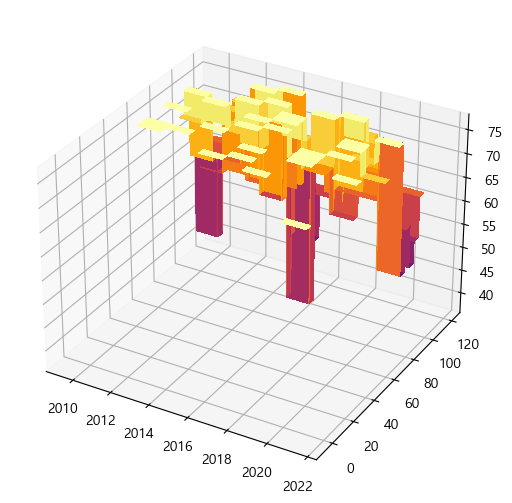

In [19]:
im_pengkde_L_masked = np.ma.masked_array(im_pengkde_L, im_pengkde_L <= 0)

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, 
                cmap="inferno", antialiased=False)

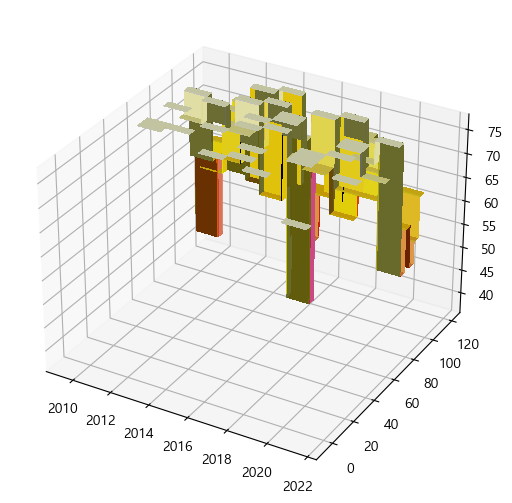

In [20]:
from matplotlib.colors import LightSource

# Light Source object 생성
ls = LightSource(azdeg=-45, altdeg=30)
# shade 생성
rgb = ls.shade(im_pengkde_L, plt.get_cmap("inferno"))

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, antialiased=False, 
                facecolors=rgb)

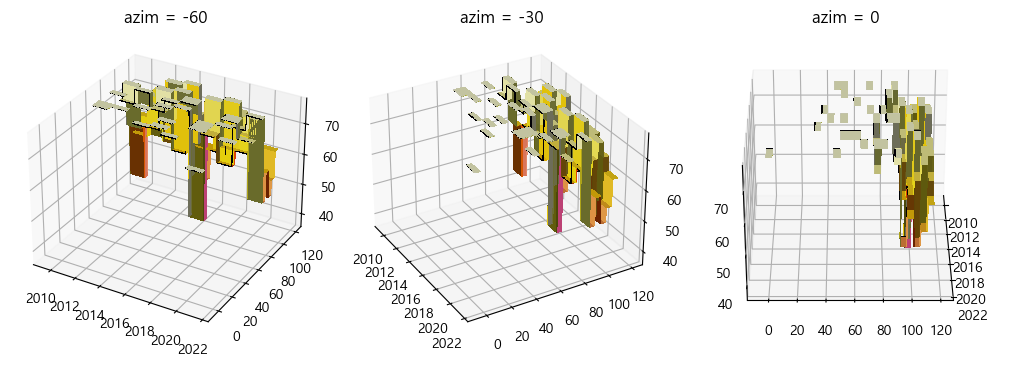

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})
elev = 30
azims = [-60, -30, 0]

for ax, azim in zip(axs, azims):
    ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=2, cstride=2, lw=0, antialiased=False, 
                    facecolors=rgb)
    ax.view_init(elev, azim)
    ax.set_title(f"azim = {azim}")

In [ ]:
from matplotlib import animation
! pip install ffmpeg-python
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

def init():
    ls = LightSource(azdeg=-45, altdeg=30)
    rgb = ls.shade(im_pengkde_L, plt.get_cmap("inferno"))
    ax.set_xlabel("bill length (mm)", fontdict=fontlabel, labelpad=16)
    ax.set_ylabel("bill depth (mm)", fontdict=fontlabel, labelpad=16)
    ax.set_title("Kernel Density", fontdict=fontlabel)
    ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, antialiased=False, 
                facecolors=rgb)
    return fig,

def animate(i):
    ax.view_init(elev=30, azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

# Save
anim.save('108_mpl3d3_rot_01.gif', fps=30)

     -------------------------------------- 840.9/840.9 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for future: started
  Running setup.py install for future: finished with status 'done'


  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
MovieWriter ffmpeg unavailable; using Pillow instead.


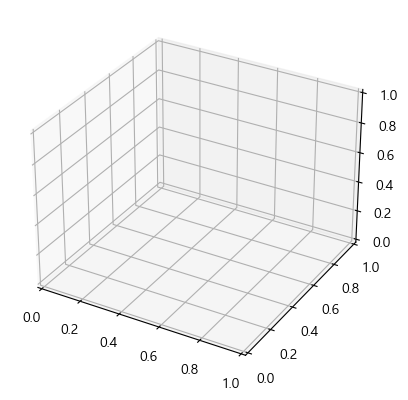

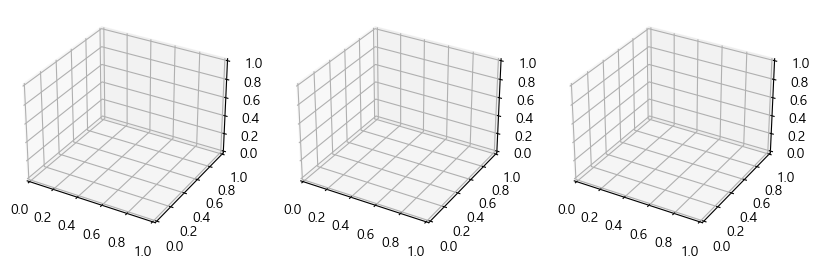

In [24]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

fig = plt.figure(figsize=(10, 3))
ax0 = fig.add_subplot(131, projection="3d")
ax1 = fig.add_subplot(132, projection="3d")
ax2 = fig.add_subplot(133, projection="3d")


X.shape=(12, 12)
Y.shape=(12, 12)
Z.shape=(12, 12)
시도별


TypeError: string indices must be integers

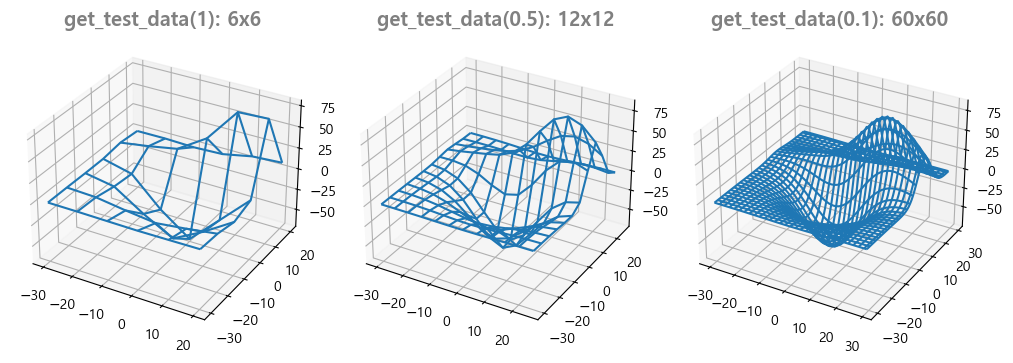

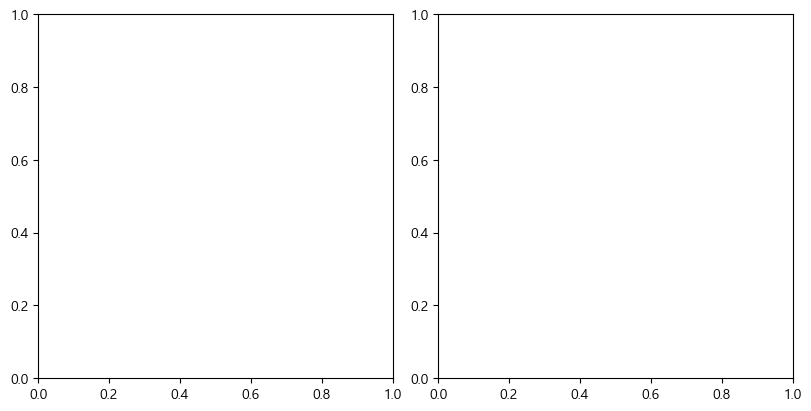

In [40]:
from mpl_toolkits.mplot3d.axes3d import get_test_data

X, Y, Z = get_test_data(0.5)

print(f"X.shape={X.shape}")
print(f"Y.shape={Y.shape}")
print(f"Z.shape={Z.shape}")

X.shape=(12, 12)
Y.shape=(12, 12)
Z.shape=(12, 12)

fig, axs = plt.subplots(ncols=3, figsize=(10, 4), subplot_kw={"projection":"3d"}, constrained_layout=True)

for ax, d in zip(axs, [1, 0.5, 0.1]):
    X, Y, Z = get_test_data(d)
    dim = X.shape[0]
    ax.plot_wireframe(X, Y, Z)
    ax.set_title(f"get_test_data({d}): {dim}x{dim}", fontsize="x-large", color="gray", fontweight="bold")

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), constrained_layout=True)

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
for ax, data in zip(axs, pd_data):
    print(data)
    ydata = "시도별" if data is pd_data else "Y2"
    ax.scatter(data["연도"], data[ydata], c=data["사망"], cmap="inferno", s=10)
    ax.set_xlabel("연도", fontdict=fontlabel)
    ax.set_ylabel(ydata, fontdict=fontlabel)